In [23]:
import os
import glob
from tqdm import tqdm
from config import Config
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

In [2]:
corpus = []
risk_file_names = glob.glob(os.path.join(Config.risk_dir(), '10k20f_5', '*.txt'))
for risk_file_name in tqdm(risk_file_names):
    with open(risk_file_name, 'r', encoding='utf-8') as risk_file:
        #import pdb; pdb.set_trace()
        docu = risk_file.read()
        if len(word_tokenize(docu)) > 100:
            corpus.append(docu)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3096/3096 [02:35<00:00, 19.96it/s]


In [3]:
sent_model = SentenceTransformer('ipuneetrathore/bert-base-cased-finetuned-finBERT')

Exception when trying to download https://sbert.net/models/ipuneetrathore/bert-base-cased-finetuned-finBERT.zip. Response 404


In [4]:
embeddings = sent_model.encode(corpus, show_progress_bar=True)

In [24]:
topic_model = BERTopic(verbose=True, n_gram_range=(1, 3), stop_words='english')

In [25]:
topics, probabilities = topic_model.fit_transform(corpus, embeddings)

2020-12-14 12:54:08,531 - BERTopic - Reduced dimensionality with UMAP
INFO:BERTopic:Reduced dimensionality with UMAP
2020-12-14 12:54:08,938 - BERTopic - Clustered UMAP embeddings with HDBSCAN
INFO:BERTopic:Clustered UMAP embeddings with HDBSCAN


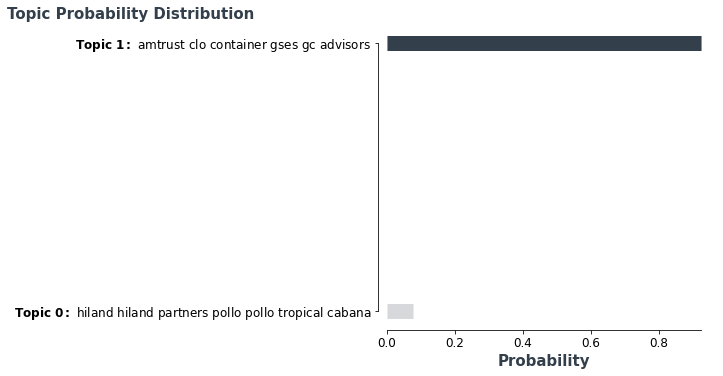

In [26]:
topic_model.visualize_distribution(probabilities[0])

In [27]:
topic_model.get_topics()

{-1: [('outdoor', 0.0022363643064706794),
  ('displays', 0.002051979075035623),
  ('iheartcommunications', 0.0019381790085659433),
  ('outdoor advertising', 0.001730309837011969),
  ('cato', 0.0015005766473687645),
  ('tms', 0.0014860059346828499),
  ('billboards', 0.0014197172779474893),
  ('layaway', 0.0013598616287695293),
  ('radio', 0.001342578966459942),
  ('street furniture', 0.0012834475112623385),
  ('feed ingredients', 0.00124604992469524),
  ('stations', 0.0011555996534861964),
  ('furniture', 0.0011480337018886892),
  ('feed', 0.0011346984690773216),
  ('companyâ', 0.001071417046177949),
  ('companyâ tms', 0.001071417046177949),
  ('iheartradio', 0.0010355256059467375),
  ('transit', 0.001030979747365687),
  ('international outdoor', 0.0010237985107922622),
  ('americas', 0.000978708494010038)],
 0: [('hiland', 0.00032624185931464067),
  ('hiland partners', 0.00032610814064998117),
  ('pollo', 0.0002901485196391369),
  ('pollo tropical', 0.0002869837142691526),
  ('cabana',